# K-Means Clustering

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [83]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3,4]].values

In [84]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder

# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')

# X = np.array(ct.fit_transform(X))

## Using the elbow method to find the optimal number of clusters

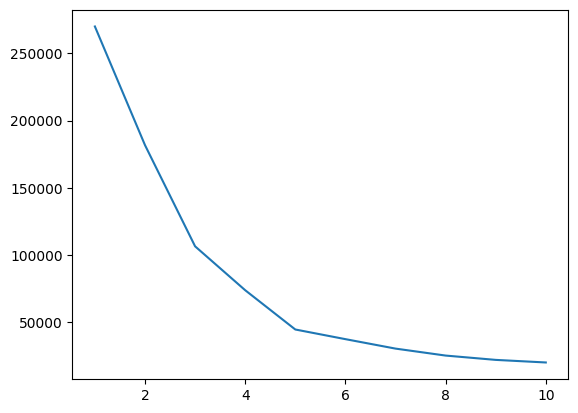

In [85]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
  cluster = KMeans(n_clusters=i, init='k-means++', n_init=10)
  cluster.fit(X)
  wcss.append(cluster.inertia_)
  
plt.plot(range(1, 11), wcss)


## Training the K-Means model on the dataset

In [86]:
from sklearn.cluster import KMeans

cluster = KMeans(n_clusters=5, n_init=10)

cluster.fit(X)

y_predict = cluster.predict(X)

In [88]:
v = pd.DataFrame(cluster.cluster_centers_, columns=['Annual Income (k$)','Spending Score (1-100)'])


## Visualising the clusters

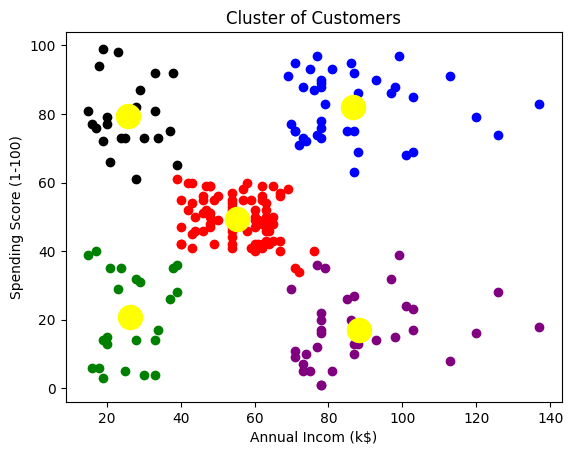

In [89]:
plt.scatter(X[y_predict == 0, 0], X[y_predict == 0, 1], c='red', label='Cluster 0')
plt.scatter(X[y_predict == 1, 0], X[y_predict == 1, 1], c='blue', label='Cluster 1')
plt.scatter(X[y_predict == 2, 0], X[y_predict == 2, 1], c='black', label='Cluster 2')
plt.scatter(X[y_predict == 3, 0], X[y_predict == 3, 1], c='purple', label='Cluster 3')
plt.scatter(X[y_predict == 4, 0], X[y_predict == 4, 1], c='green', label='Cluster 4')
plt.scatter(cluster.cluster_centers_[:, 0], cluster.cluster_centers_[:, 1], s = 300, c = 'yellow', label='Centroids')

plt.title('Cluster of Customers')
plt.xlabel('Annual Incom (k$)')
plt.ylabel('Spending Score (1-100)')
# plt.legend()

plt.show()